# SAXS&WAXS pipeline for data analysis, specifically get S(Q) curves


## Overview

* Setup: load packages/setup path
* Load and check form factors from h5 files (genreated by data reduction pipeline) 
* Load and check scattering curves from h5 files (genreated by data reduction pipeline) 
* Get Sq for one data
* Find the interested dataset and do batch analysis
* Produce images (png format)
* Append the (q,sq) results to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package  
* V2: Update the keys in the output h5 file

 

## TODLIST

* 1): Put codes into a package (Done)



# Load Package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

In [40]:
%matplotlib inline

# Setup Paths

In [5]:
####
username = 'yuzhang'
inDir = '/home/%s/Test_SAXS/Data/'%username
outDir = '/home/%s/Test_SAXS/Results/'%username



inDir = '/home/yuzhang/XScattering/Beam_Damage_Study/Results/'
outDir = '/home/yuzhang/XScattering/Beam_Damage_Study/Results/'



# Check H5 Filenames in inDir

In [12]:
flist_all = ls_dir( inDir, have_list=['.h5'], exclude_list=[ 'png' ])
print( len(flist_all))
print(flist_all)

4
['WAXS_setup_pargs_CMS_201910.h5' 'SAXS_setup_pargs_CMS_201910.h5'
 '63302744-cdca-43a8-9080_000123.tiff.h5'
 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [4]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

# Setup SQ Data Analysis Parameters Using One Data

## 1) check form factor 

In [14]:
flist = ls_dir( inDir, have_list=['Form_Factor', '10nm', 'h5'], exclude_list=['png', 'csv', '0.04s'])


print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [15]:
form_factor_filename = inDir + 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5'


In [16]:
res_pq = h5todict( form_factor_filename )  
q0 = res_pq['ciravg']['data'][:,0]     
pq0 =res_pq['ciravg']['data'][:,1] 

<IPython.core.display.Javascript object>


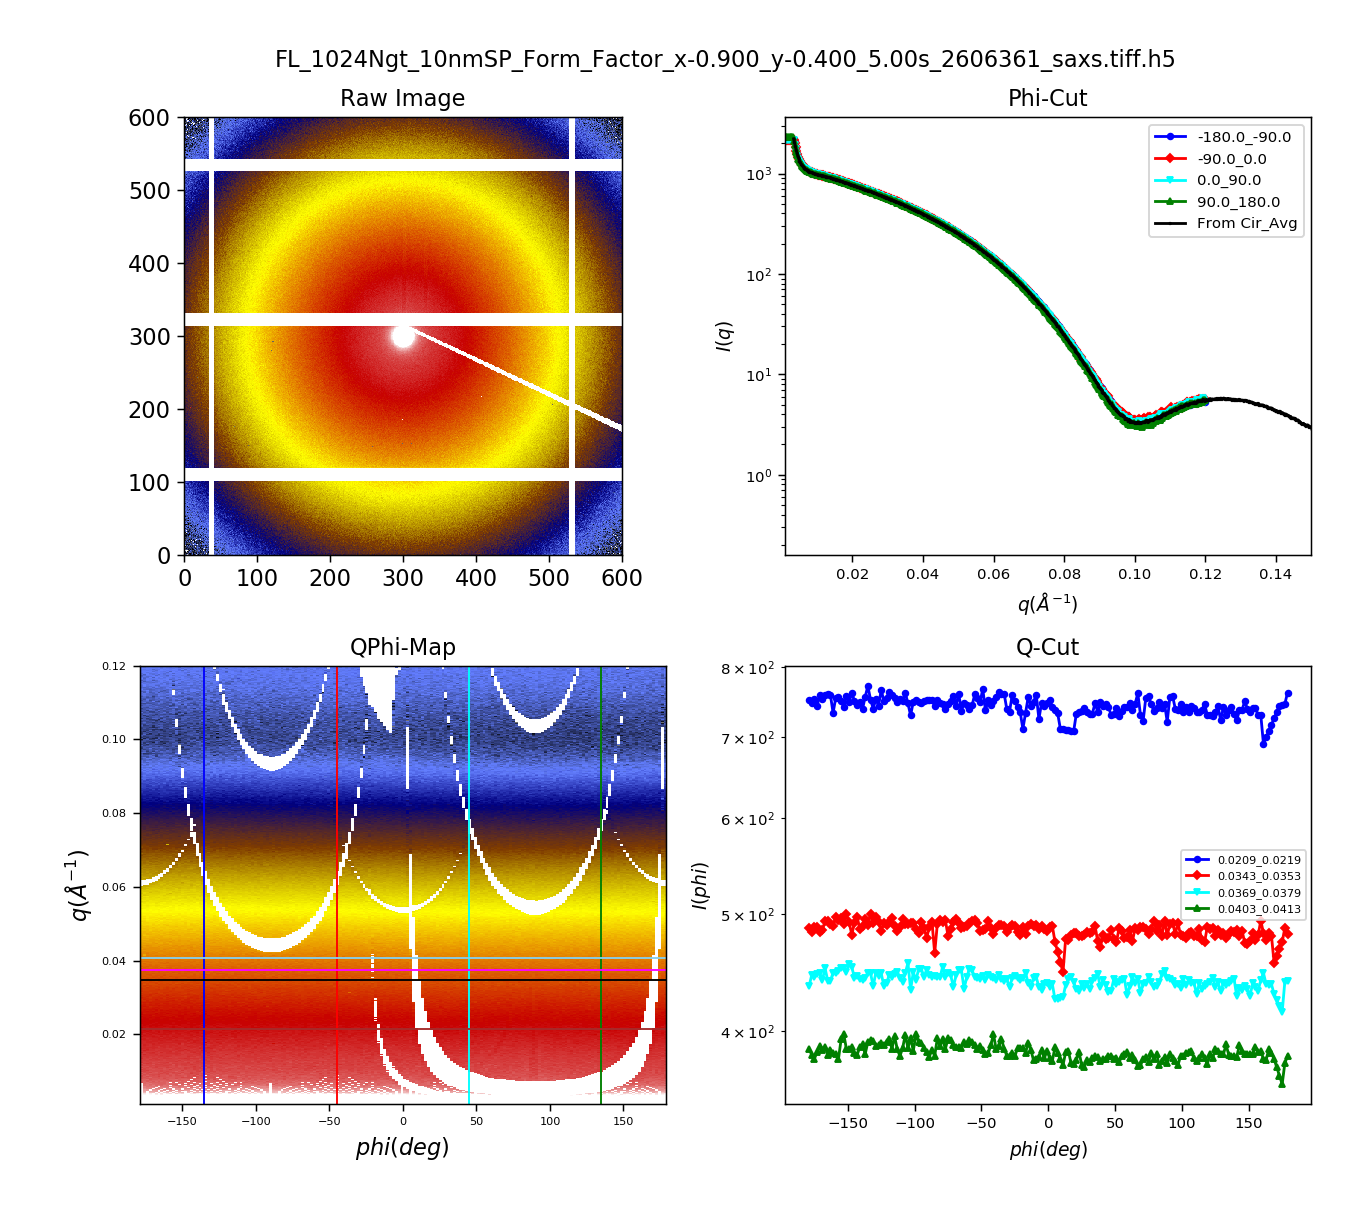

/home/yuzhang/conda_envs/pyScattering/lib/python3.7/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


In [17]:
Plot_SAXS_Data_Reduction( res_pq['md']['io']['out']['filename']  ) 

### Check multi form factors if needed

In [18]:
print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


<IPython.core.display.Javascript object>


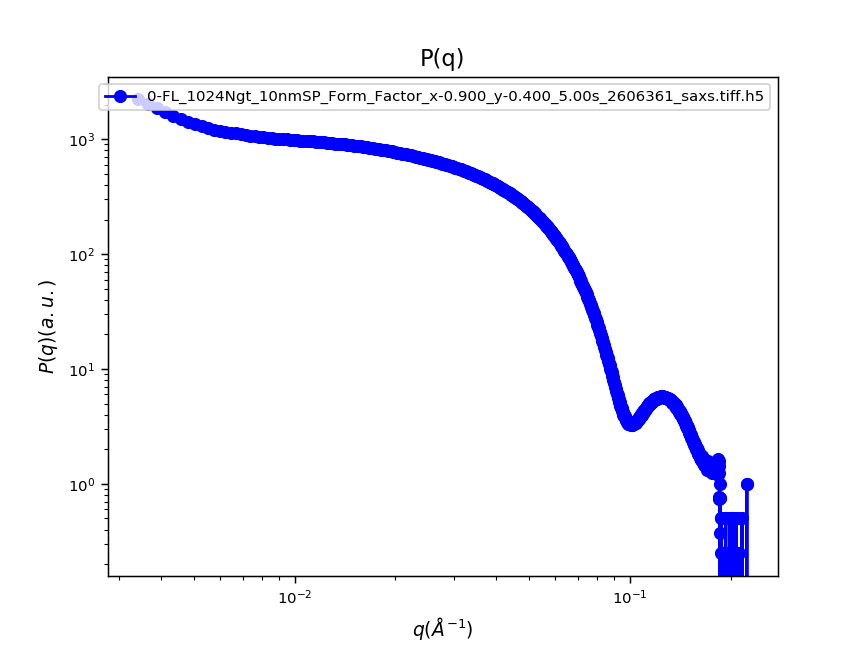

0 FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5


Text(0.5, 1.0, 'P(q)')

In [19]:

fig, ax = plt.subplots()
i=0
for fp in flist:     
    print(i, fp)
    resi = h5todict( inDir + fp )  
    qi= resi['ciravg']['data'][:,0]     
    pqi=resi['ciravg']['data'][:,1]             
    plot1D(x=qi,y=  pqi  , ax=ax, logy= True, legend_size=8,
           c= colors[i], m= markers[i], legend='%s-%s'%(i,fp )  )
    i += 1    
ax.set_xscale('log')
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$P(q) (a.u.)$')
ax.set_title( 'P(q)')

In [20]:
print(flist_all)

['WAXS_setup_pargs_CMS_201910.h5' 'SAXS_setup_pargs_CMS_201910.h5'
 '63302744-cdca-43a8-9080_000123.tiff.h5'
 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


## 2) Check One Scattering Data

In [21]:
flist = ls_dir( inDir, have_list=['63302744', 'h5'], exclude_list=['png', 'csv' ])


print(len(flist))
print(flist)

1
['63302744-cdca-43a8-9080_000123.tiff.h5']


In [22]:
fp = '63302744-cdca-43a8-9080_000123.tiff.h5' 


In [23]:
res = h5todict(  inDir + fp   )


<IPython.core.display.Javascript object>


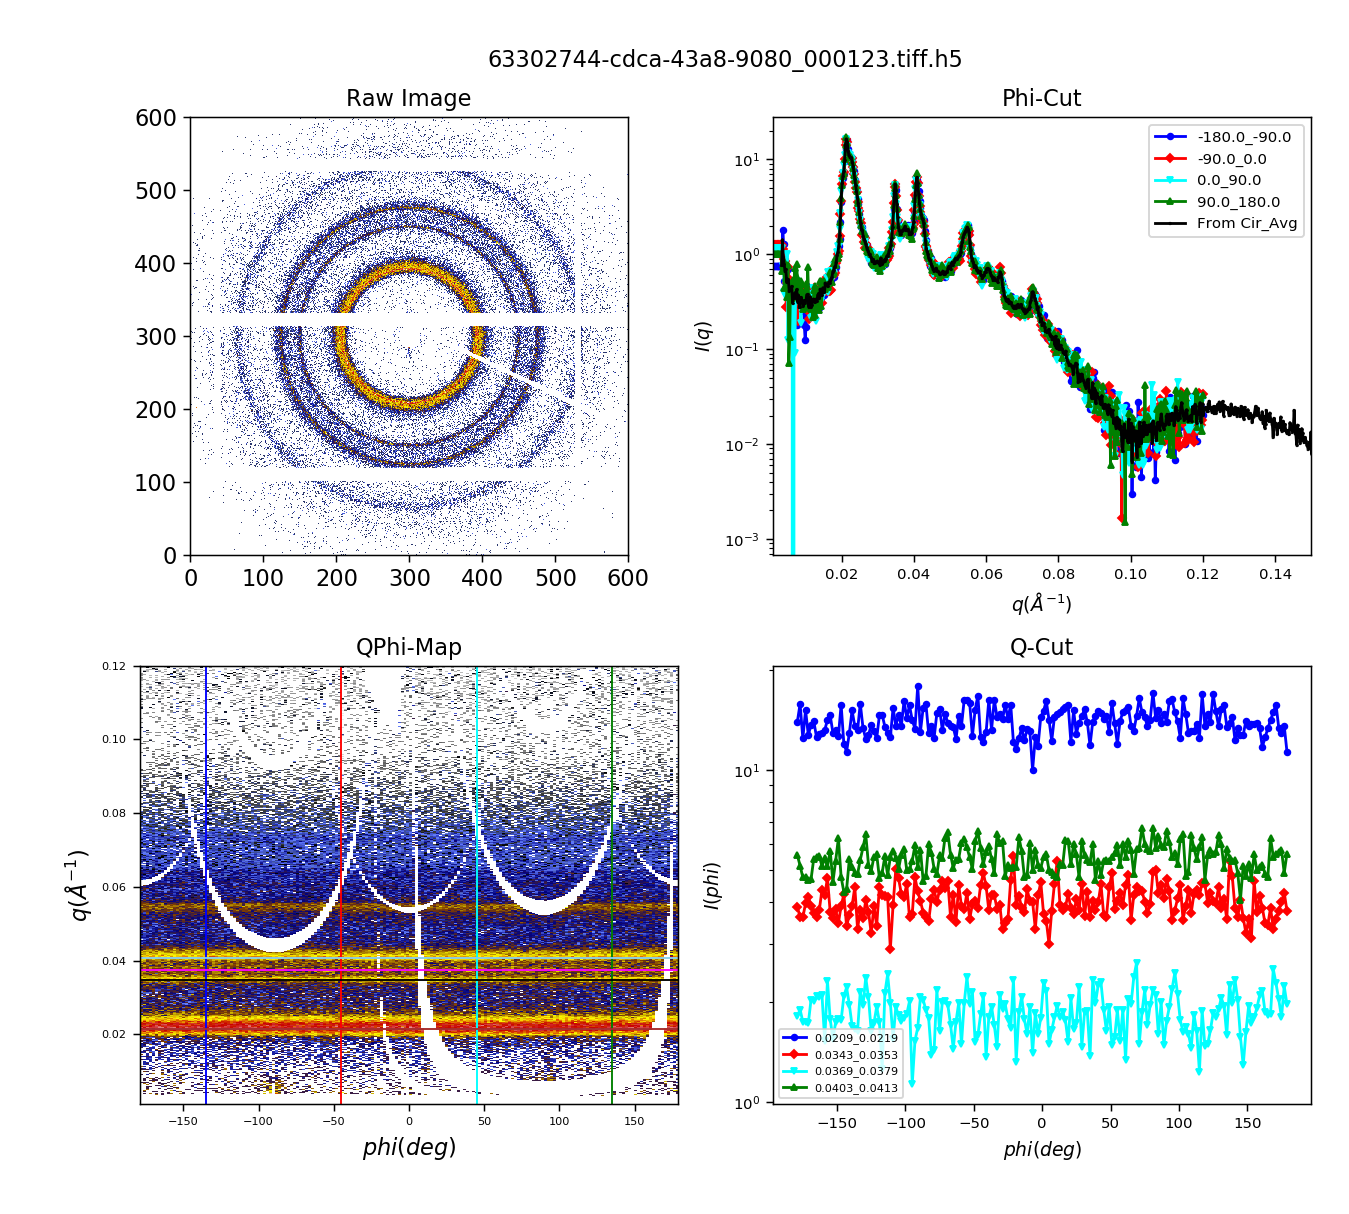

In [24]:
Plot_SAXS_Data_Reduction( res['md']['io']['out']['filename']  ) 

### Label peaks for simple structures ( availabe phases: SC, BCC, FCC, HCP, NA (unknown) )

In [25]:
search_qmax_range = [0.001, 0.1 ]

phase = 'FCC'
#phase = 'NA'
#phase = 'SC'

In [26]:
q= res['ciravg']['data'][:,0]     
iq=res['ciravg']['data'][:,1] 
if len(q)!=len(q0):
    pqc=np.interp( q, q0, pq0)
else:
    pqc=pq0
qpeak, iqm = find_max_peak( q, iq, search_qmax_range )

<IPython.core.display.Javascript object>


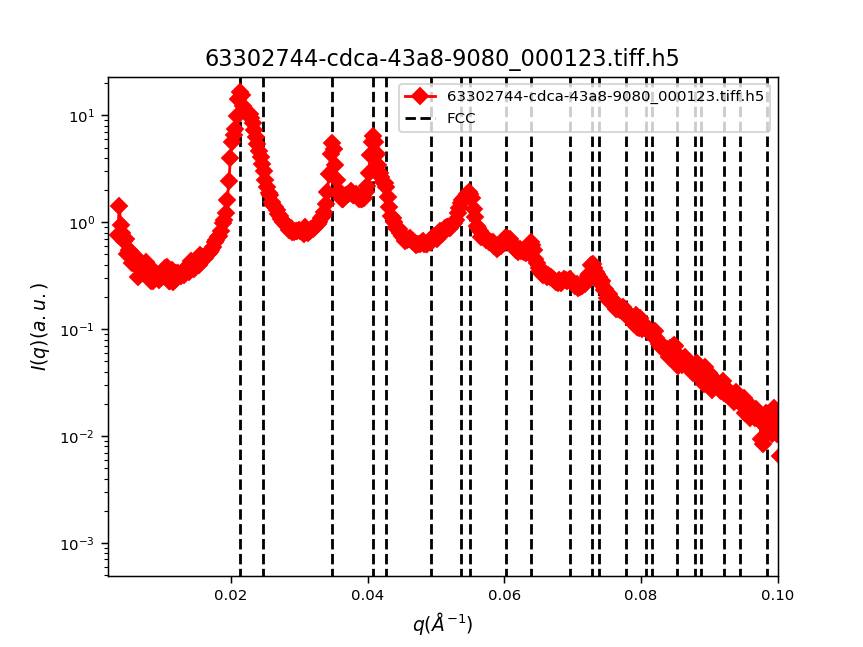

/home/yuzhang/conda_envs/pyScattering/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


(0.0004926128134591694, 23.0351606805293)

In [27]:
fig, ax = plt.subplots()    
plot1D(x=q,y=   iq  , ax=ax, logy=True, c=colors[i], m= markers[i], legend=fp, xlim=[0.002,0.1] )
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$I(q) (a.u.)$')
ax.set_title( fp)    
if phase!='NA':
    ax.vlines( Peak_Dict[phase]*qpeak, 0, 1e4, linestyle='--', color='k',  label= phase  )
ax.legend(loc = 'best', fontsize= 8 )
ax.set_ylim( iq.min(), iq.max()*1.4)

### Get Sq

* Plot pq and iq together

<IPython.core.display.Javascript object>


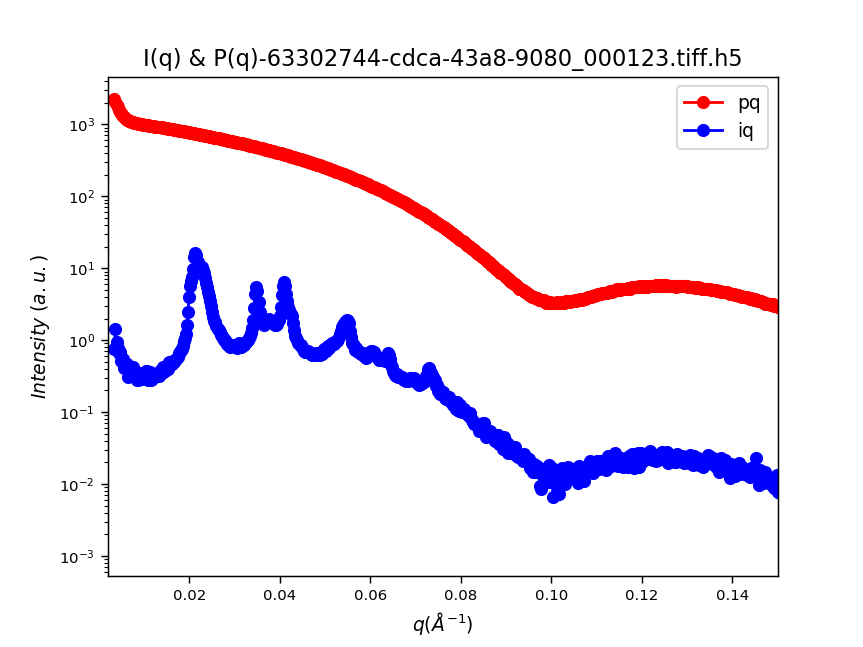

Text(0.5, 1.0, 'I(q) & P(q)-63302744-cdca-43a8-9080_000123.tiff.h5')

In [28]:
fig, ax = plt.subplots()
plot1D(x=q,y=pqc  , ax=ax, logy=True, c='r', m='o', legend='pq')
plot1D(x=q,y=iq   , ax=ax, logy=True, c='b', m='o', legend='iq',  xlim=[0.002, 0.15],  )

ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$Intensity\ (a.u.)$')
ax.set_title( 'I(q) & P(q)-%s'%fp)

* Define parameters for the calculatoin of sq  

In [29]:
iq_bg = 1  #acount the background using a scalar
pq_bg = 1  #acount the background using a scalar
qstart_scale = 0.025  #qstart value for scale iq
qend_scale = 0.05     #qend value for scale iq
qstart_bg = 0.08          #qstart value for match iq and pq 
qend_bg = 0.12           #qstart value for match iq and pq 

qplot_range = [0.002, 0.12]
sqplot_range = [0.01, 5]
iqplot_range = [ 5,1e6]


## Get Sq for ciravg

In [30]:
#y = np.interp(q2, q, iq) 
qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iq + iq_bg , pqc + pq_bg ,
                                                qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                qstart_bg=qstart_bg, qend_bg= qend_bg) 

df_ciravg = trans_data_to_pd( [ qX, SqX], label=[ 'q_saxs', 'sq_saxs'] ,dtype= 'list' ) 
df_ciravg.to_csv( outDir + '%s_q_Sq.csv'%fp )

 

k for Sq scale is: 0.005821261997204404
background for Sq scale is: 168.91249472030185


[5, 1000000.0]


<IPython.core.display.Javascript object>


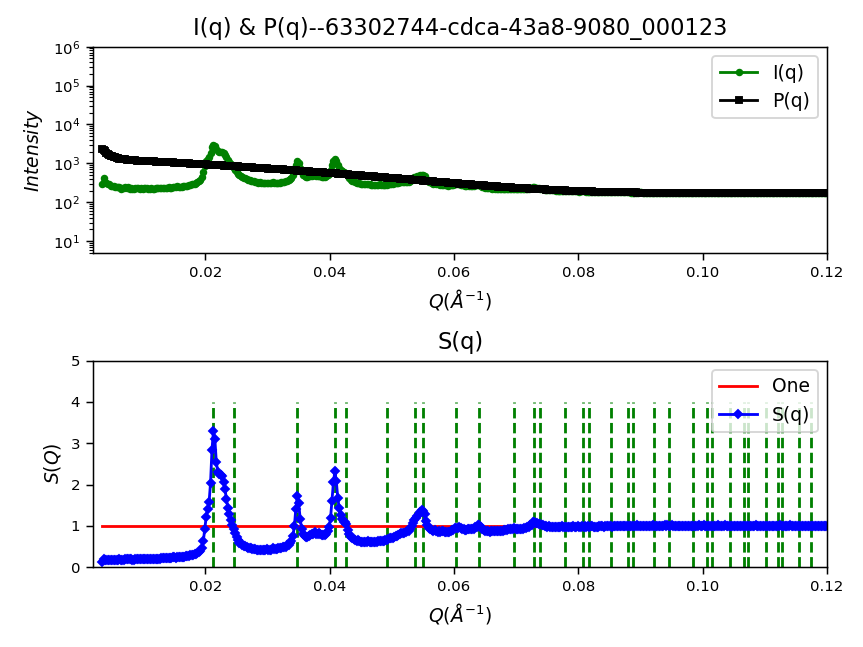

In [31]:
plot_iq_pq_sq( qX, iq_scaleX, pq_scaleX, SqX,xlim=qplot_range, 
              sq_limit=sqplot_range, iq_limit=iqplot_range,
              phase= phase, peak_int=[ 4 ],   qmax= qpeak,           
               title = fp[:-8], filename= outDir + 'Sq_%s'%fp[:] ,save= True )#False)#True)  

## Get Sq for phi-cut iqs

In [32]:
plot_sqs = False
sqs_yshift = 3


In [33]:
q= res['qphi']['iqs']['data'][:,0]     
iqs= res['qphi']['iqs']['data']
label_iqs  = res['qphi']['iqs']['label']
Nang=len(label_iqs)-1
sqs=np.zeros_like(iqs)
sqs[:,0]=q
label_sqs =  label_iqs
print(Nang)
if len(q)!=len(q0):
    pqi=np.interp( q, q0, pq0)
else:
    pqi=pq0

4


In [34]:
for i in range(  Nang ):    
    lab = label_iqs[i+1]
    qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iqs[:,i] + iq_bg , pqi + pq_bg ,
                                                qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                qstart_bg=qstart_bg, qend_bg= qend_bg, verbose=False) 
    sqs[:,i+1]=SqX
    if plot_sqs:
        plot_iq_pq_sq( qX, iq_scaleX, pq_scaleX, SqX,xlim=qplot_range, 
              sq_limit=sqplot_range, iq_limit=iqplot_range,
              phase= phase, peak_int=[ 4 ],   qmax= qpeak,           
               title = fp[:-7] + lab, filename= outDir + 'Sq_%s_Ang_%s'%(fp[:], lab) ,save= True )#False)#True)  
    
df_sqs = trans_data_to_pd( sqs, label=label_sqs ,dtype= 'array' )   
df_sqs.to_csv( outDir + '%s_q_Sqs.csv'%fp )   

<IPython.core.display.Javascript object>


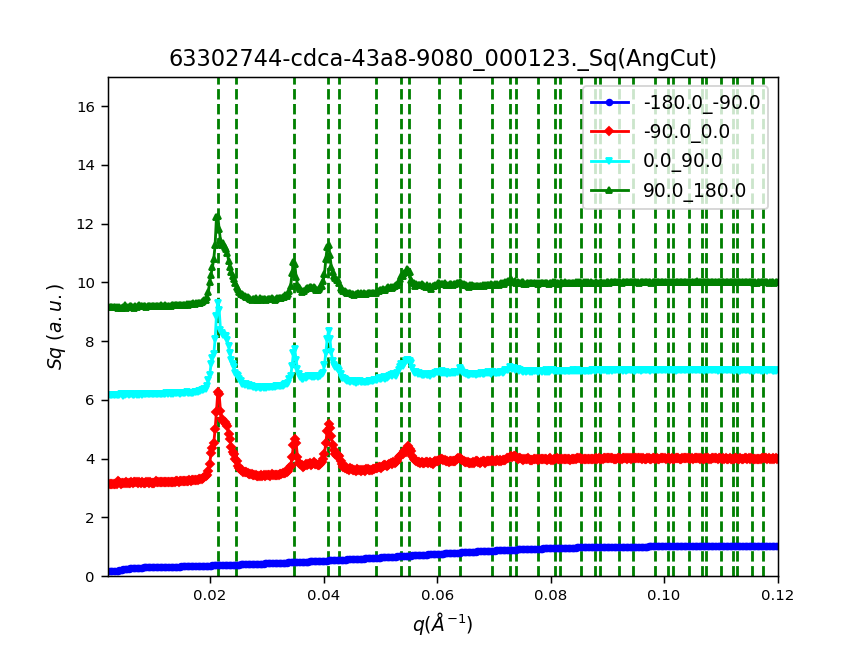

In [35]:
fig, ax = plt.subplots()
for i in range( Nang):    
    plot1D( x = sqs[:,0], y = sqs[:,i+1] + sqs_yshift *i, yerr= None, logy= False, 
             ylim= [ sqplot_range[0] , sqplot_range[1] +sqs_yshift * (Nang) ], 
              xlim=qplot_range,  ax=ax, legend=label_sqs[i+1], title=fp[:-7] + '_Sq(AngCut)',
                       c=colors[i], m = markers[i],   markersize= 3 ) 

ax.vlines( Peak_Dict[phase]*qpeak, 0, 30, linestyles='--', colors='g',   label= phase ) 
     
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$Sq\ (a.u.)$')
fig.savefig( outDir + 'Sqs_%s.png'%fp[:]  )    

Res =  { 'ciravg': {'data': df_ciravg, 'label': [ 'q_saxs', 'sq_saxs']  } , 
          'qphi':    {'data': df_sqs, 'label': label_sqs   },
              }  
dicttoh5( Res, inDir + fp, h5path="/sq/", mode='a', overwrite_data = True ) 


# Put all the parameters together for running batch analysis

In [36]:
saxs_data_analysis_pargs={}
saxs_data_analysis_pargs['form_factor_filename'] = form_factor_filename
saxs_data_analysis_pargs['iq_bg'] = iq_bg
saxs_data_analysis_pargs['pq_bg'] = pq_bg
saxs_data_analysis_pargs['qstart_scale'] = qstart_scale
saxs_data_analysis_pargs['qend_scale'] = qend_scale
saxs_data_analysis_pargs['qstart_bg'] =qstart_bg
saxs_data_analysis_pargs['qend_bg']  = qend_bg
saxs_data_analysis_pargs['outDir']= outDir


saxs_data_plot_pargs={}
saxs_data_plot_pargs['search_qmax_range'] =search_qmax_range
saxs_data_plot_pargs['phase']  = phase
saxs_data_plot_pargs['qplot_range'] = qplot_range
saxs_data_plot_pargs['sqplot_range'] =sqplot_range
saxs_data_plot_pargs['iqplot_range'] = iqplot_range
saxs_data_plot_pargs['plot_sqs'] = plot_sqs
saxs_data_plot_pargs['sqs_yshift'] = sqs_yshift
saxs_data_plot_pargs['outDir']= outDir


# Define the parameter for papermill

In [38]:
uid_list =  [  '63302744-cdca-43a8-9080_000123.tiff.h5'   ]



## Get SQ for multi-data

0 63302744-cdca-43a8-9080_000123.tiff.h5
k for Sq scale is: 0.005821261997204404
background for Sq scale is: 168.91249472030185
The Sq is sucessfully append to the h5 file: /home/yuzhang/XScattering/Beam_Damage_Study/Results/63302744-cdca-43a8-9080_000123.tiff.h5.
[5, 1000000.0]


<IPython.core.display.Javascript object>


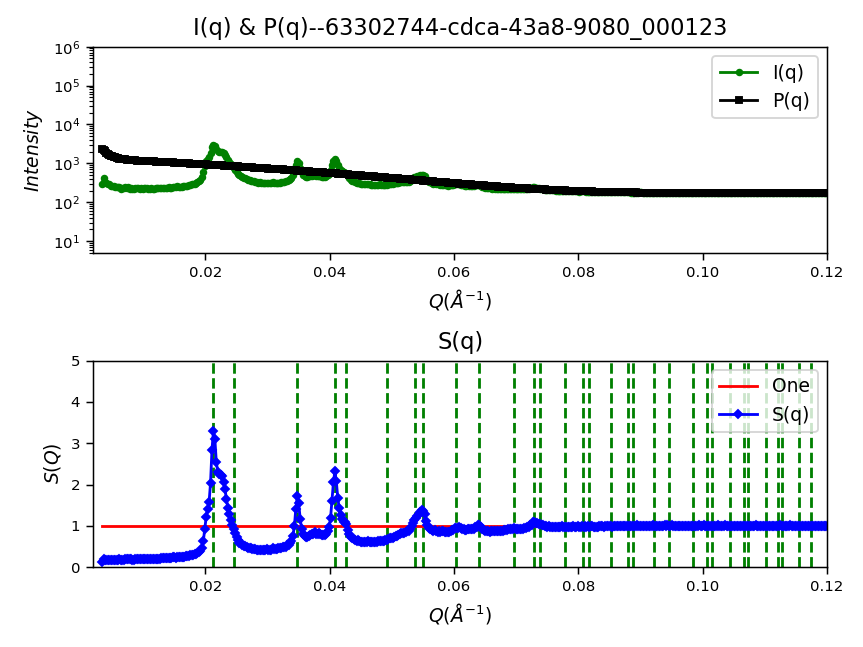

<IPython.core.display.Javascript object>


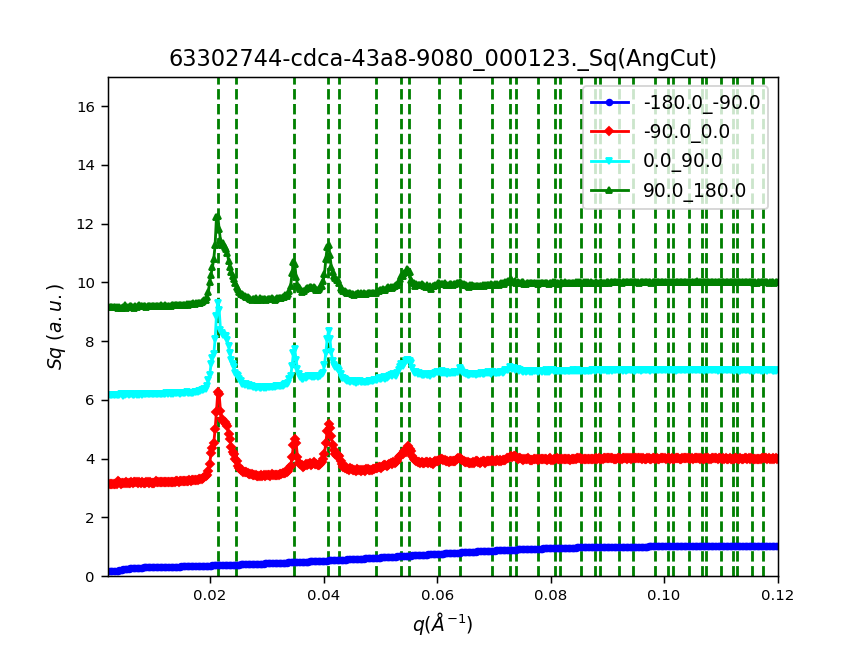

Total time: 1.103 sec


In [39]:
t0 = time.time() 
for i, fp in enumerate(uid_list ):      
    print(i, fp)
    if True:
    #try: 
        Run_SAXS_SQ_Data_Aanalysis( inDir + fp ,   saxs_data_analysis_pargs,    verbose=True,   ) 
        Plot_SAXS_SQ_Data_Aanalysis(  inDir + fp ,   saxs_data_plot_pargs    )

    #except:
    #    print('Something wrong with this data: %s'%fp)
run_time( t0 )      

In [ ]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

# The END!